# Metin Ön işleme ve Görselleştirme
## Problem 
Wikipedia metinleri içeren veri setine metin ön işleme ve görselleştirme yapınız.


In [1]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from wordcloud import WordCloud, ImageColorGenerator
import nltk

filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

df = pd.read_csv('datasets/wiki_data.csv', index_col=0)
df.head(10)

,text
1,Anovo\n\nAnovo (formerly A Novo) is a computer...
2,Battery indicator\n\nA battery indicator (also...
3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
4,CAVNET\n\nCAVNET was a secure military forum w...
5,CLidar\n\nThe CLidar is a scientific instrumen...
6,Capacity loss\n\nCapacity loss or capacity fad...
7,Carbon Recycling International\n\nCarbon Recyc...
8,Chemical Agent Resistant Coating\n\nChemical A...
9,Claas Cougar\n\nThe Claas Cougar is a self-pro...
10,"Conductive polymer\n\nConductive polymers or, ..."


### Görev 1: Metin Ön İşleme İşlemlerini Gerçekleştiriniz

Adım1: Metin ön işleme için clean_text adında fonksiyon oluşturunuz. Fonksiyon;

• Büyük küçük harf dönüşümü,

• Noktalama işaretlerini çıkarma,

• Numerik ifadeleri çıkarma Işlemlerini gerçekleştirmeli.


In [2]:
def clean_text(dframe, col):
    dframe[col] = dframe[col].str.lower()
    dframe[col] = dframe[col].str.replace('[^\w\s]', '')
    dframe[col] = dframe[col].str.replace('\d', '')

Adım2: Yazdığınız fonksiyonu veri seti içerisindeki tüm metinlere uygulayınız.

In [3]:
clean_text(df, 'text')
df.head(5)

,text
1,anovo\n\nanovo formerly a novo is a computer s...
2,battery indicator\n\na battery indicator also ...
3,bob pease\n\nrobert allen pease august â â ju...
4,cavnet\n\ncavnet was a secure military forum w...
5,clidar\n\nthe clidar is a scientific instrumen...


Adım3: Metin içinde öznitelik çıkarımı yaparken önemli olmayan kelimeleri çıkaracak remove_stopwords adında fonksiyon yazınız.

In [4]:
def remove_stopwords(dframe, col, language='english'):
    sw = stopwords.words(language)
    dframe[col] = dframe[col].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))


Adım4: Yazdığınız fonksiyonu veri seti içerisindeki tüm metinlere uygulayınız.

In [5]:
remove_stopwords(df, 'text')


Adım5: Metinde az geçen (1000'den az, 2000'den az gibi) kelimeleri bulunuz. Ve bu kelimeleri metin içerisinden çıkartınız.

In [6]:
temp_df = pd.Series(' '.join(df['text']).split()).value_counts()
drops = temp_df[temp_df <= 1000]
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in drops))


Adım6: Metinleri tokenize edip sonuçları gözlemleyiniz.

In [7]:
df["text"].apply(lambda x: TextBlob(x).words).head()

1    [computer, services, company, based, france, f...
2    [battery, battery, also, known, battery, devic...
3    [august, â, â, june, analog, integrated, circu...
4    [military, became, april, part, allows, access...
5    [scientific, instrument, used, lower, camera, ...
Name: text, dtype: object

Adım7: Lemmatization işlemi yapınız.

In [8]:
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


## Görev 2: Veriyi Görselleştiriniz

Adım1: Metindeki terimlerin frekanslarını hesaplayınız.

In [9]:
tf = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns = ["words", "tf"]
tf.sort_values("tf", ascending=False)[:20]

,words,tf
19,used,29403.00
23,system,26873.00
30,also,22951.00
40,use,16820.00
228,one,15929.00
100,â,15769.00
139,first,15284.00
1,company,13806.00
22,may,13555.00
85,time,12703.00


Adım2: Bir önceki adımda bulduğunuz terim frekanslarının Barplot grafiğini oluşturunuz.

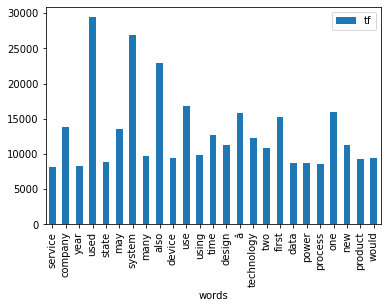

In [10]:
tf[tf["tf"] > 8000].plot.bar(x="words", y="tf")
plt.show()

Adım3: Kelimeleri WordCloud ile görselleştiriniz.

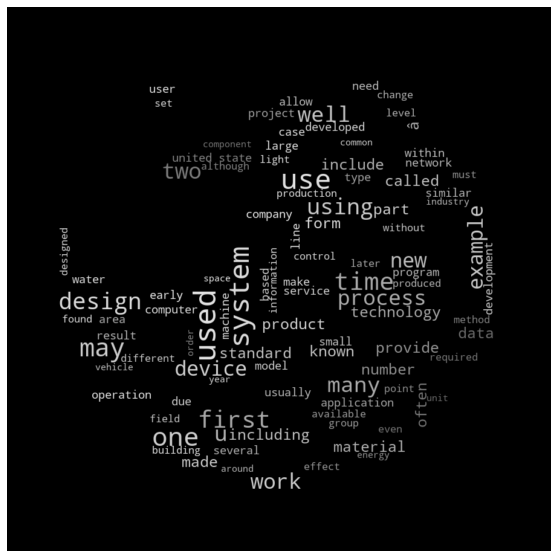

In [13]:
text = " ".join(i for i in df.text)
mask = np.array(Image.open("wiki.jpg"))
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="black",
                      mask=mask).generate(text)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

## Görev 3: Tüm Aşamaları Tek Bir Fonksiyon Olarak Yazınız

Adım1: Metin ön işleme işlemlerini gerçekleştiriniz.

Adım2: Görselleştirme işlemlerini fonksiyona argüman olarak ekleyiniz.

Adım3: Fonksiyonu açıklayan 'docstring' yazınız.

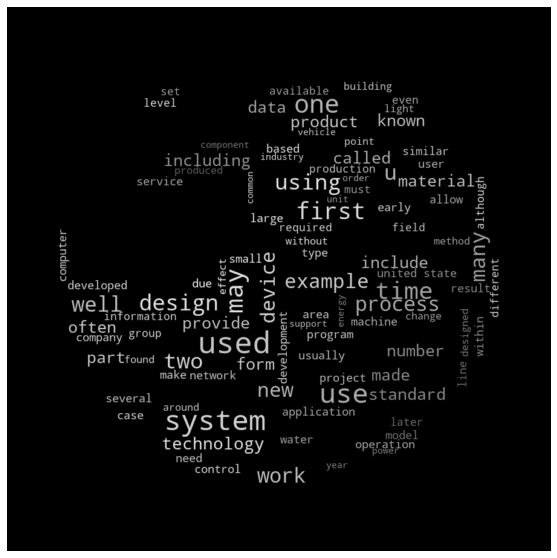

In [15]:
def nlp_text(dframe, col, language='english', threshold_drop=1000, bar_plot=False, threshold_bar=8000, word_cloud=False):
    """
    Veri setinde kullanıcının belirlediği ve text içeren kolon üzerinde metin ön işleme adımları uygulayan ve görselleştiren
    fonksiyondur.
    Parameters
    ------------
        dframe : dataframe
                Üzerinde işlem yapılacak dataframe.
        col :   string
                Üzerinde işlem yapılacak sütun.
        language : string, optional
                Stop words işlemi yapılacak metinin dili.
        threshold_drop: int, optional
                Metinde az geçen kelimeler için belirlenen eşik değeri.
        bar_plot: bool, optional
                Metindeki terimlerin frekanslarını bar plot grafik ile görselleştirir.
        threshold_bar: int, optional
                Bar plot kullanılması durumunda grafikte gösterilecek terimlerin frekansının eşik değeri.
        word_cloud : bool, optional
                Metindeki terimlerin frekanslarını word cloud ile görselleştirir.
    Examples
    ------------
    df dataframe'inde yer alan text sütunundaki terimlerin frekanslarını word cloud ile görselleştiren fonksiyon.
    df = pd.read_csv('datasets/wiki_data.csv', index_col=0)
    nlp_text(df, 'text', word_cloud=True)
    Returns
    ------------
    dataframe : Metin ön işleme işlemlerinin gerçekleştirildiği dataframe.
    """
    dframe[col] = dframe[col].str.lower()
    dframe[col] = dframe[col].str.replace('[^\w\s]', '')
    dframe[col] = dframe[col].str.replace('\d', '')

    sw = stopwords.words(language)
    dframe[col] = dframe[col].apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))

    temp_df = pd.Series(' '.join(df['text']).split()).value_counts()
    drops = temp_df[temp_df <= threshold_drop]
    dframe[col] = dframe[col].apply(lambda x: " ".join(x for x in x.split() if x not in drops))

    dframe[col] = dframe[col].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
    dframe[col] = dframe[col].apply(lambda x: " ".join(x for x in str(x).split() if x not in ' â '))

    if bar_plot:

        tf = dframe[col].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
        tf.columns = ["words", "tf"]
        tf[tf["tf"] > threshold_bar].plot.bar(x="words", y="tf")
        plt.show()

    if word_cloud:

        text = " ".join(i for i in dframe[col])
        mask = np.array(Image.open("wiki.jpg"))
        wordcloud = WordCloud(max_font_size=50,
                              max_words=100,
                              background_color="black",
                              mask=mask).generate(text)
        image_colors = ImageColorGenerator(mask)
        plt.figure(figsize=(20, 10))
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
        plt.axis("off")
        plt.show()

nlp_text(df, 'text', word_cloud=True)